**Practice 2:**  
    *Goal:*
  - PCA, LDA, ...
  - ColumnTransformer, ...
  - StandardScaler, ...
  - Pipeline
  - Fine-tuniing

In [3]:
#load wine data
from sklearn.datasets import load_wine
data = load_wine()

In [4]:
X= data.data
y=data.target

In [5]:
print(X)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [6]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend .plotting import plot_decision_regions

In [11]:
dfX = pd.DataFrame(X, columns = [
    "Alcohol",
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Colour Intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]
)

In [12]:
dfX.head()

Alcohol  Malic Acid   Ash  Alcalinity of Ash  Magnesium  Total Phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   Flavanoids  Nonflavanoid Phenols  Proanthocyanins  Colour Intensity   Hue  \
0        3.06                  0.28             2.29              5.64  1.04   
1        2.76                  0.26             1.28              4.38  1.05   
2        3.24                  0.30             2.81              5.68  1.03   
3        3.49                  0.24             2.18              7.80  0.86   
4        2.69                  0.39             1.82              4.32  1.04   

   OD280/OD315 of diluted wines  Proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

In [13]:
dfX.describe()

Alcohol  Malic Acid         Ash  Alcalinity of Ash   Magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Colour Intensity         Hue  OD280/OD315 of diluted wines      Proline  
count        178.000000  178.000000                    178.000000   178.000000  
mean           5.058090    0.957449                      2.611685   746.893258  
std            2.318286    0.228572                      0.709990   314.907474  
min            1.280000    0.480000                      1.270000   278.000000  
25%            3.220000    0.782500                      1.937500   500.500000  
50%            4.690000    0.965000                      2.780000   673.500000  
75%            6.200000    1.120000                      3.170000   985.000000  
max           13.000000    1.710000                      4.000000  1680.000000

In [16]:
dfX.corr()

Alcohol  Malic Acid       Ash  \
Alcohol                       1.000000    0.094397  0.211545   
Malic Acid                    0.094397    1.000000  0.164045   
Ash                           0.211545    0.164045  1.000000   
Alcalinity of Ash            -0.310235    0.288500  0.443367   
Magnesium                     0.270798   -0.054575  0.286587   
Total Phenols                 0.289101   -0.335167  0.128980   
Flavanoids                    0.236815   -0.411007  0.115077   
Nonflavanoid Phenols         -0.155929    0.292977  0.186230   
Proanthocyanins               0.136698   -0.220746  0.009652   
Colour Intensity              0.546364    0.248985  0.258887   
Hue                          -0.071747   -0.561296 -0.074667   
OD280/OD315 of diluted wines  0.072343   -0.368710  0.003911   
Proline                       0.643720   -0.192011  0.223626   

                              Alcalinity of Ash  Magnesium  Total Phenols  \
Alcohol                               -0.310235   0.270798       0.289101   
Malic Acid                             0.288500  -0.054575      -0.335167   
Ash                                    0.443367   0.286587       0.128980   
Alcalinity of Ash                      1.000000  -0.083333      -0.321113   
Magnesium                             -0.083333   1.000000       0.214401   
Total Phenols                         -0.321113   0.214401       1.000000   
Flavanoids                            -0.351370   0.195784       0.864564   
Nonflavanoid Phenols                   0.361922  -0.256294      -0.449935   
Proanthocyanins                       -0.197327   0.236441       0.612413   
Colour Intensity                       0.018732   0.199950      -0.055136   
Hue                                   -0.273955   0.055398       0.433681   
OD280/OD315 of diluted wines          -0.276769   0.066004       0.699949   
Proline                               -0.440597   0.393351       0.498115   

                              Flavanoids  Nonflavanoid Phenols  \
Alcohol                         0.236815             -0.155929   
Malic Acid                     -0.411007              0.292977   
Ash                             0.115077              0.186230   
Alcalinity of Ash              -0.351370              0.361922   
Magnesium                       0.195784             -0.256294   
Total Phenols                   0.864564             -0.449935   
Flavanoids                      1.000000             -0.537900   
Nonflavanoid Phenols           -0.537900              1.000000   
Proanthocyanins                 0.652692             -0.365845   
Colour Intensity               -0.172379              0.139057   
Hue                             0.543479             -0.262640   
OD280/OD315 of diluted wines    0.787194             -0.503270   
Proline                         0.494193             -0.311385   

                              Proanthocyanins  Colour Intensity       Hue  \
Alcohol                              0.136698          0.546364 -0.071747   
Malic Acid                          -0.220746          0.248985 -0.561296   
Ash                                  0.009652          0.258887 -0.074667   
Alcalinity of Ash                   -0.197327          0.018732 -0.273955   
Magnesium                            0.236441          0.199950  0.055398   
Total Phenols                        0.612413         -0.055136  0.433681   
Flavanoids                           0.652692         -0.172379  0.543479   
Nonflavanoid Phenols                -0.365845          0.139057 -0.262640   
Proanthocyanins                      1.000000         -0.025250  0.295544   
Colour Intensity                    -0.025250          1.000000 -0.521813   
Hue                                  0.295544         -0.521813  1.000000   
OD280/OD315 of diluted wines         0.519067         -0.428815  0.565468   
Proline                              0.330417          0.316100  0.236183   

                              OD280/OD315 of dilute

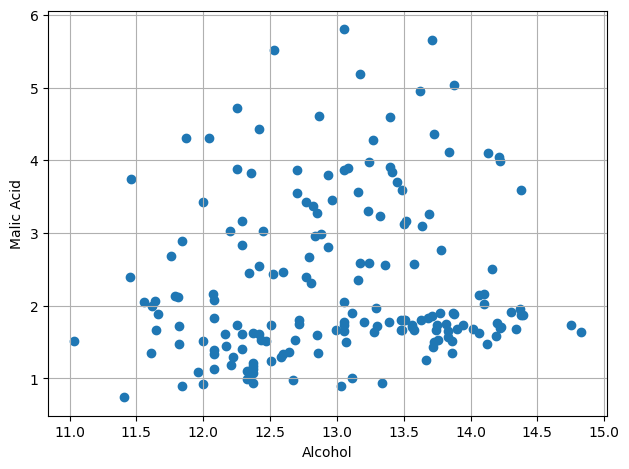

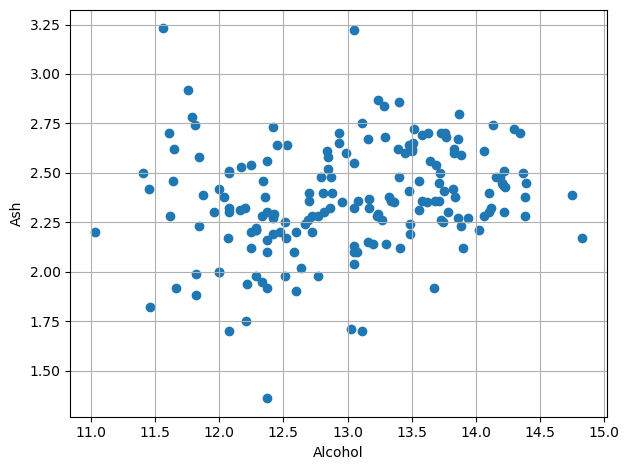

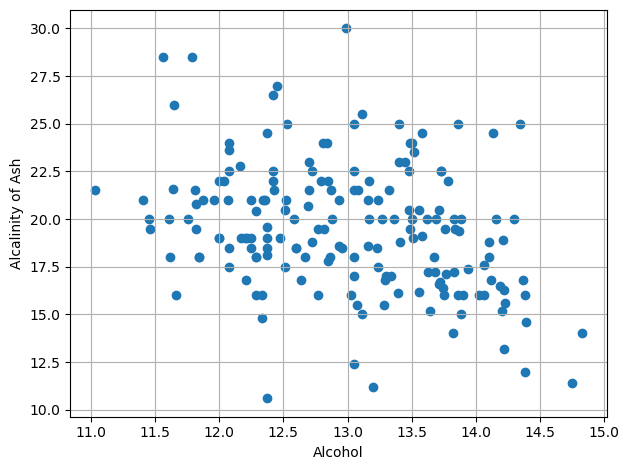

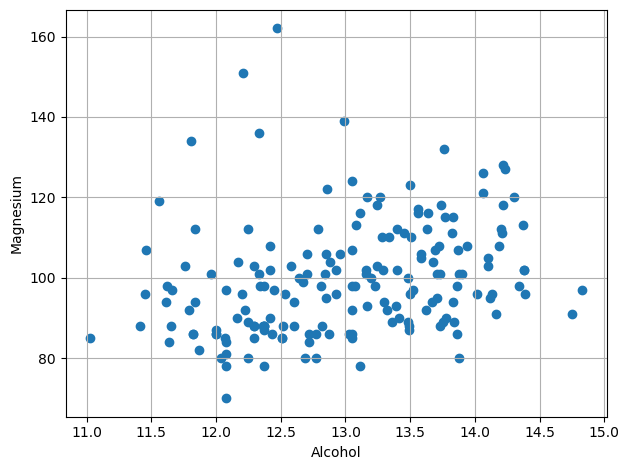

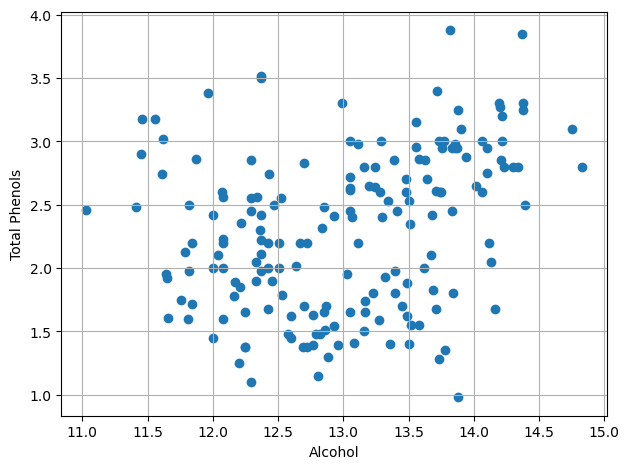

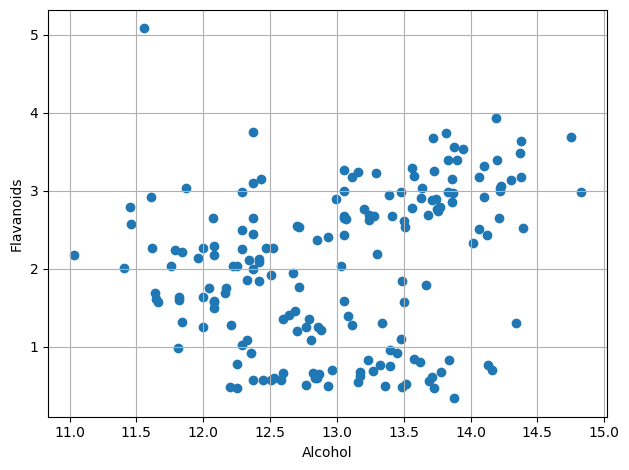

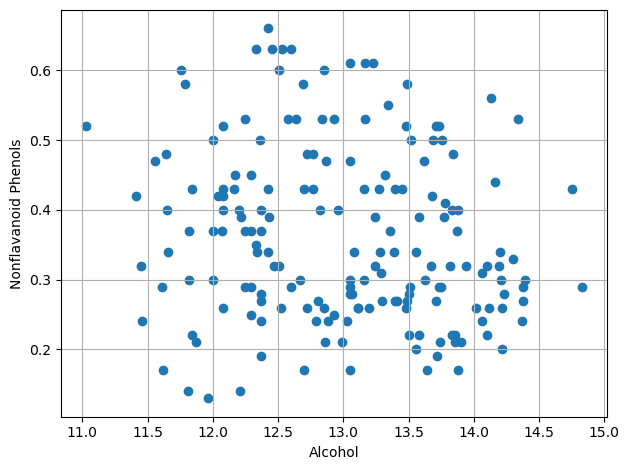

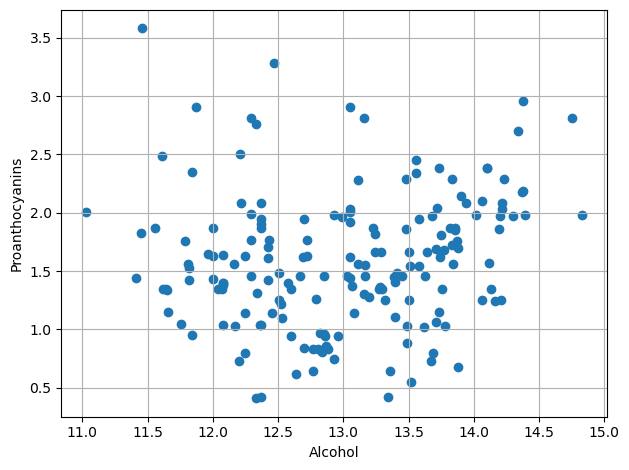

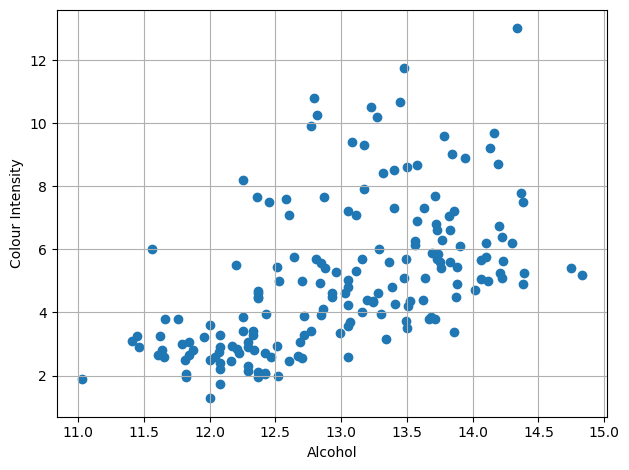

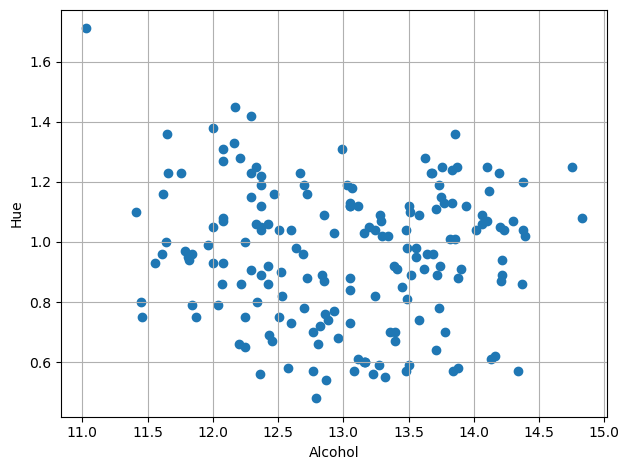

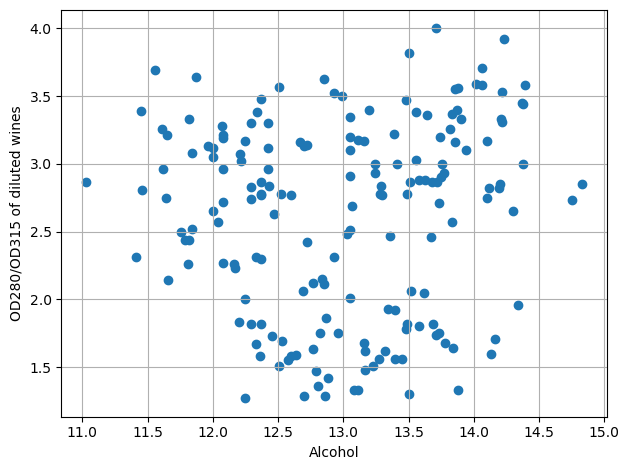

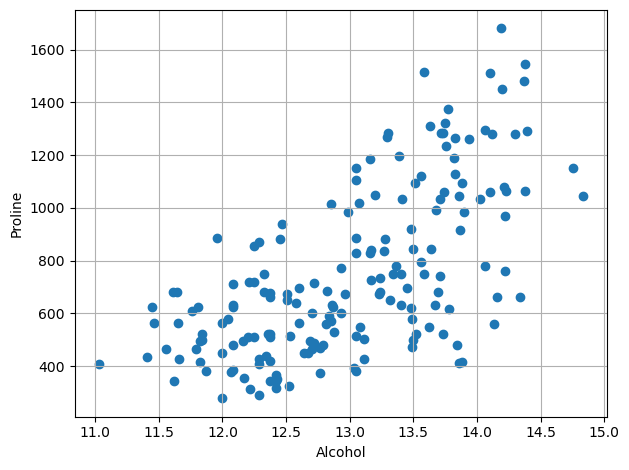

In [19]:
for col in dfX.columns:
    if col != 'Alcohol':
        plt.scatter(x = dfX.loc[:, 'Alcohol'],
                    y = dfX.loc[:, col])
        plt.xlabel('Alcohol')
        plt.ylabel(f'{col}')
        plt.tight_layout()
        plt.grid(True)
        plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13108\1367380845.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


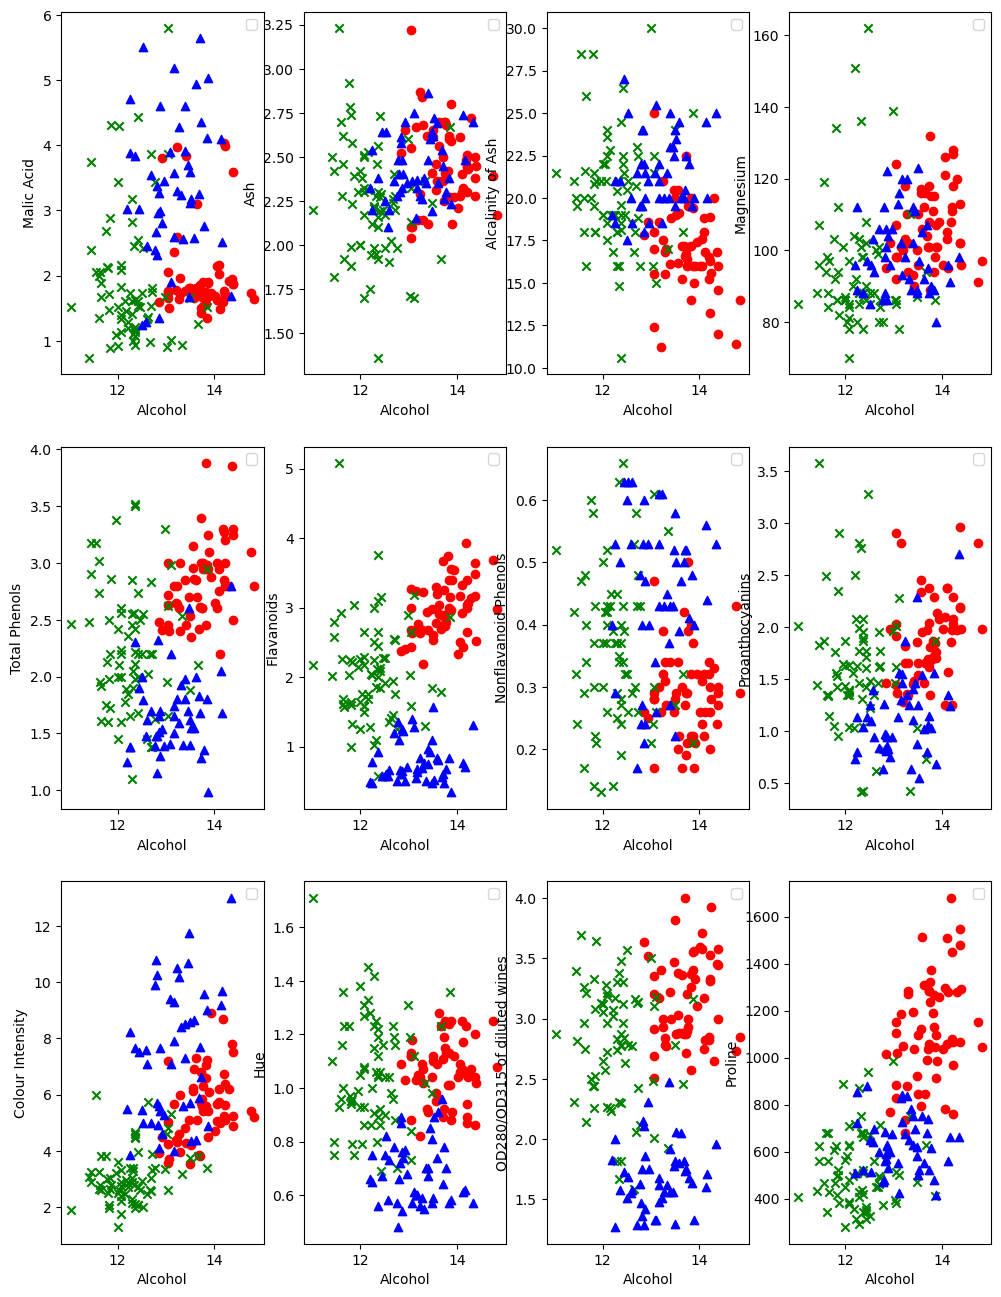

In [24]:
#Trying to draw to see is it possible to using just 2 attributes
fig, axes = plt.subplots(3, 4, figsize = (3 * 4, 4 * 4))
columns = [
    "Malic Acid",
    "Ash",
    "Alcalinity of Ash",
    "Magnesium",
    "Total Phenols",
    "Flavanoids",
    "Nonflavanoid Phenols",
    "Proanthocyanins",
    "Colour Intensity",
    "Hue",
    "OD280/OD315 of diluted wines",
    "Proline"
]
axes = axes.flatten()
for col, ax in zip(columns, axes):
    zero_cl = dfX[y == 0]
    one_cl = dfX[y == 1]
    two_cl = dfX[y == 2]
    ax.scatter(x = zero_cl['Alcohol'], y = zero_cl[col], marker = 'o', color = 'red')
    ax.scatter(x = one_cl['Alcohol'], y = one_cl[col], marker = 'x', color = 'green')
    ax.scatter(x = two_cl['Alcohol'], y = two_cl[col], marker = '^', color = 'blue')
    ax.set_xlabel('Alcohol')
    ax.set_ylabel(f'{col}')
    ax.legend()
plt.show()

In [27]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 293, test_size = 0.25)

# StandardScaler

In [29]:
#Standardized data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# PCA

In [35]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

In [36]:
X_train_pca

array([[ 3.78128986,  2.11480409],
       [ 4.5268633 ,  1.54605557],
       [-1.70566119, -1.18963157],
       [ 2.61603863,  0.874287  ],
       [-1.5382969 , -1.37493162],
       [ 0.258841  , -3.7118609 ],
       [-3.44159772,  1.47374397],
       [-0.3682682 , -0.53651623],
       [ 1.25879205, -1.02452635],
       [-2.87446904,  1.62329077],
       [-3.04929185,  0.89097289],
       [-0.63018315, -1.79273615],
       [-0.80811824, -2.67318012],
       [ 2.33321112, -0.71946918],
       [-2.49901859,  0.11710798],
       [ 2.96506858,  0.51398652],
       [ 0.92431295, -2.73854235],
       [-2.32551794,  2.2037844 ],
       [ 2.36436266,  0.64469265],
       [-2.73372793,  0.82084329],
       [-0.12347309, -1.02731758],
       [ 1.55317152, -1.40426431],
       [ 1.36438959, -2.20902423],
       [ 2.60082096,  1.15412414],
       [-2.72854478,  1.96620878],
       [-3.136052  ,  2.35692688],
       [-0.96812693, -2.52931731],
       [ 2.5922603 ,  1.15896047],
       [ 2.65241164,

In [38]:
pca.n_components_ #components that explains most variance

2

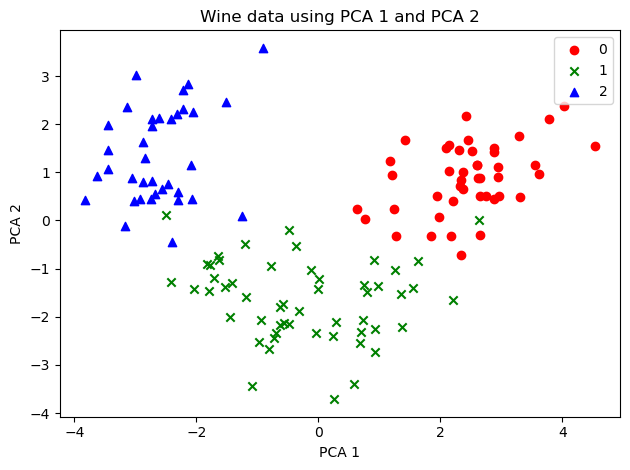

In [40]:
#plot wine data based on new axis
fig, ax = plt.subplots()
class_zero = X_train_pca[y_train == 0]
class_one = X_train_pca[y_train == 1]
class_two = X_train_pca[y_train == 2]
ax.scatter(x = class_zero[:, 0], y = class_zero[:, 1], marker = 'o', color = 'red', label = '0')
ax.scatter(x = class_one[:, 0], y = class_one[:, 1], marker = 'x', color = 'green', label = '1')
ax.scatter(x = class_two[:, 0], y = class_two[:, 1], marker = '^', color = 'blue', label = '2')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.legend()
ax.set_title('Wine data using PCA 1 and PCA 2')
plt.tight_layout()
plt.show()

In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l2', C = 10, random_state =934)
lr.fit(X_train_pca, y_train)

LogisticRegression(C=10, random_state=934)

In [42]:
lr.score(X_test_pca, y_test)

0.9111111111111111

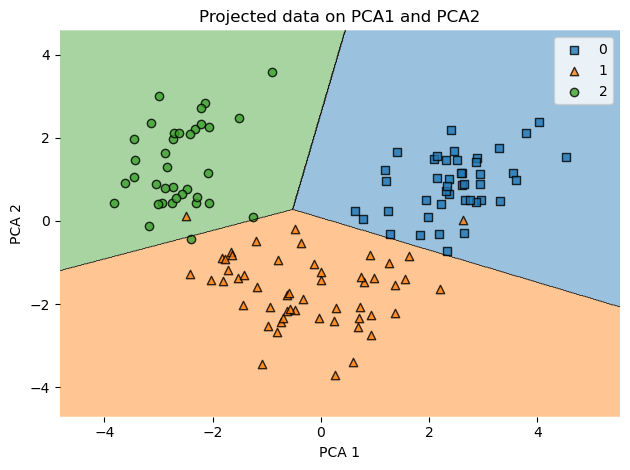

In [43]:
plot_decision_regions(X_train_pca, y_train, clf = lr, legend = 3)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Projected data on PCA1 and PCA2')
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
from sklearn.svm import SVC
sv = SVC(kernel = 'rbf', gamma = 1.0, C = 50, random_state = 239)
sv.fit(X_train, y_train)

SVC(C=50, gamma=1.0, random_state=239)

In [46]:
sv.fit(X_train_pca, y_train)

SVC(C=50, gamma=1.0, random_state=239)

In [47]:
sv.score(X_test_pca, y_test)

0.9333333333333333

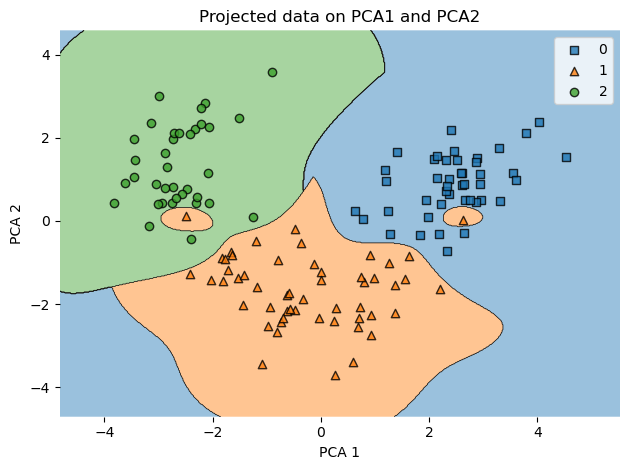

In [48]:
plot_decision_regions(X_train_pca, y_train, clf = sv, legend = 3)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Projected data on PCA1 and PCA2')
plt.legend()
plt.tight_layout()
plt.show()

In [50]:
sv2 = SVC(gamma = 0.01, C = 50, random_state = 247)
sv2.fit(X_train_pca, y_train)
sv2.score(X_test_pca, y_test)

0.9333333333333333

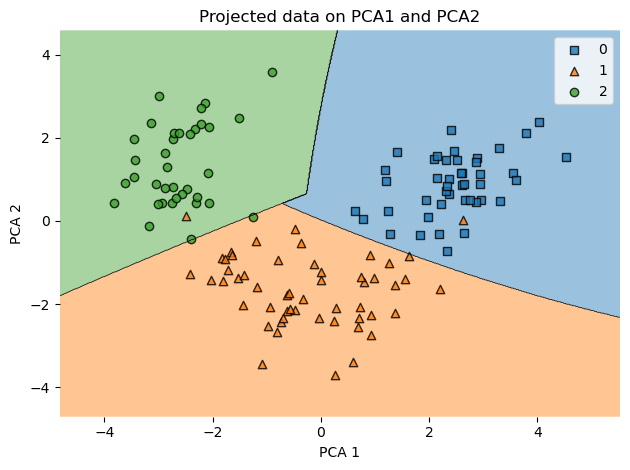

In [51]:
plot_decision_regions(X_train_pca, y_train, clf = sv2, legend = 3)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Projected data on PCA1 and PCA2')
plt.legend()
plt.tight_layout()
plt.show()

# Pipeline

In [57]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA()),
                  ('svc', SVC())])

In [58]:
pipe1 = pipe.set_params(svc__C = 10, svc__gamma = 1, pca__n_components = 2)

In [59]:
pipe1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('svc', SVC(C=10, gamma=1))])

In [60]:
pipe1.score(X_test, y_test)

0.9333333333333333

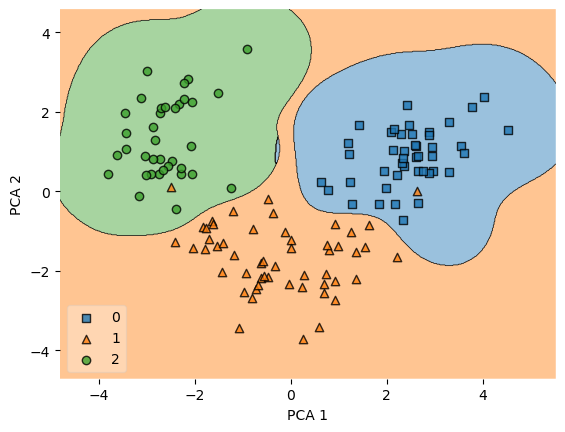

In [62]:
X_transformed = pipe.named_steps['pca'].transform(
    pipe1.named_steps['scaler'].transform(X_train)
)
plot_decision_regions(X_transformed, y_train, clf = pipe1.named_steps['svc'], legend = 3)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [63]:
pipe1.named_steps

{'scaler': StandardScaler(),
 'pca': PCA(n_components=2),
 'svc': SVC(C=10, gamma=1)}

In [66]:
from sklearn.datasets import load_diabetes
diabetes_data = load_diabetes()

In [70]:
features = [
    "age",  # age in years
    "sex",
    "bmi",  # body mass index
    "bp",   # average blood pressure
    "s1",   # tc, total serum cholesterol
    "s2",   # ldl, low-density lipoproteins
    "s3",   # hdl, high-density lipoproteins
    "s4",   # tch, total cholesterol / HDL
    "s5",   # ltg, possibly log of serum triglycerides level
    "s6"    # glu, blood sugar level
]
X= diabetes_data.data
t = diabetes_data.target
df = pd.DataFrame(X, columns = features)

In [71]:
df.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641

In [73]:
df.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01  
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324559e-02 -3.317903e-02  
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03  
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243232e-02  2.791705e-02  
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01

Can't do Label transform with this dataset, i thought `sex` is qualitative value